In [1]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
# Загрузим данные.
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

Изучим данные в файлах и типы данных столбцов.

In [3]:
display(train.head(10)) 
train.info() 

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
5,41415,18FEB2014,SCH,M,27,Y,N,0,1,-2.032257,0,50,1,1,15000,2,3,N,0
6,28436,04FEB2014,SCH,M,39,N,N,0,0,-2.225004,0,60,1,2,28000,1,1,N,0
7,68769,17MAR2014,SCH,F,39,N,N,0,0,-1.522739,1,50,2,3,45000,3,3,N,0
8,38424,14FEB2014,SCH,F,50,Y,N,1,0,-1.676061,0,50,1,1,30000,1,4,N,0
9,4496,10JAN2014,UGR,F,54,N,N,0,0,-2.695176,1,50,2,3,24000,1,3,N,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

Мы видим, что в Data 73799 строк и 19 столбцов (колонок):

13 колонок содержат числовые данные 

    client_id - идентификатор клиента
    age - возраст заемщика
    decline_app_cnt - количество отказанных прошлых заявок
    good_work - флаг наличия “хорошей” работы
    score_bki - скоринговый балл по данным из БКИ
    bki_request_cnt - количество запросов в БКИ
    region_rating - рейтинг региона
    home_address - категоризатор домашнего адреса
    work_address - категоризатор рабочего адреса
    income - доход заемщика
    sna - связь заемщика с клиентами банка
    first_time - давность наличия информации о заемщике
    
    default - флаг дефолта по кредиту - в колонке данные содержащие наш прогнозируемый параметр - вероятность дефолта клиента по шкале от 0 до 1;

6 колонок содержат данные типа 'object':

    4 колонки содержат данные, которые можно отнести к бинарным признакам:
        sex - пол заемщика (Y/N)
        car - флаг наличия автомобиля (Y/N)
        car_type - флаг автомобиля иномарки (Y/N)
        foreign_passport - наличие загранпаспорта (F/M)
    1 колонка 'education' - уровень образования - категоральный признак
    1 колонка 'app_date' - дата подачи заявки - строковая величина, содержащая информацию о дате.

In [4]:
# Изучим параметр 'client_id'

train.client_id.value_counts().sort_values()

6141     1
14329    1
16376    1
18423    1
20470    1
        ..
24588    1
96303    1
45078    1
320      1
2049     1
Name: client_id, Length: 73799, dtype: int64

Все значения параметра 'client_id' уникальные.

Проверим пропуски в колонках:

In [5]:
train.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

<AxesSubplot:>

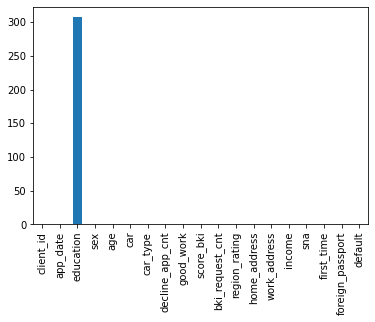

In [6]:
train.isnull().sum().plot.bar()

Мы видим, что пропуски содержаться только в одном признаке 'education' - уровень образования. Рассмотрим значения этого признака подробнее и избавимся от пропусков.

In [7]:
train['education'].value_counts() # Какие значения содержатся и как часто повторяются?

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

<AxesSubplot:>

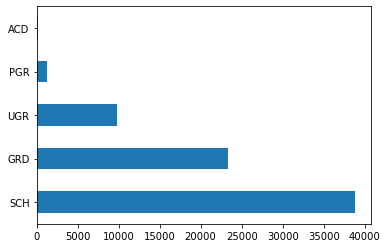

In [8]:
train['education'].value_counts().plot.barh() # Визуализируем

In [9]:
# Заполним пропуски наиболее часто повторяющимся значением.

train.loc[(train['education'].isnull()), 'education'] = 'OTHER'

In [10]:
train.info() # Проверим, заполнены ли пропуски.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73799 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [11]:
# Сгруппируем в три категории по типу их обработки (категориальные, бинарные и числовые).
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'home_address', 'work_address', 'sna', 'first_time']
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating']

# Категоральные признаки.
Преобразуем бинарные признаки в числовые (0 или 1).

In [12]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
# убедимся в преобразовании    
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0
1,63161,12MAR2014,SCH,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0
2,25887,01FEB2014,SCH,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0
3,16222,23JAN2014,SCH,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0
4,101655,18APR2014,GRD,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0


Попробую преобразовать признак 'app_date' в число и посмотрим результат.

In [13]:
import datetime

train['app_date'] = pd.to_datetime(train['app_date'])
train['app_date'] = train['app_date'].astype(str)
train['app_date'] = train['app_date'].str.replace('-', '').astype(int)

In [14]:
# убедимся в преобразовании    
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,20140201,SCH,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0
1,63161,20140312,SCH,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0
2,25887,20140201,SCH,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0
3,16222,20140123,SCH,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0
4,101655,20140418,GRD,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0


/Users/aleksandrasokolova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


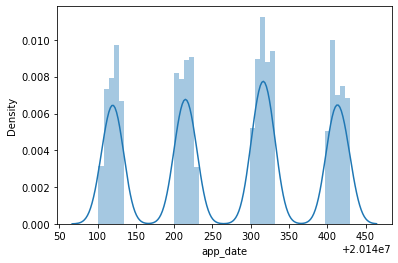

In [15]:
sns_plot = sns.distplot(train['app_date'])
fig = sns_plot.get_figure()

Ну все же добавим его к числовым признакам.

Так же преобразуем категоральный признак 'education' в числовой.
Используем dummy-кодирование. 
Метод, который называется One-Hot Encoding. Смысл его точно такой же, как у dummy-кодирования.

In [16]:
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)

In [17]:
# Добавим признак 'app_date' в группу числовых признаков.

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating', 'app_date']

# Числовые признаки.

Проверим числовые признаки на наличие выбросов.

25-й перцентиль: 50.0, 75-й перцентиль: 60.0, IQR: 10.0, Границы выбросов [35.0, 75.0].


<module 'matplotlib.pyplot' from '/Users/aleksandrasokolova/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

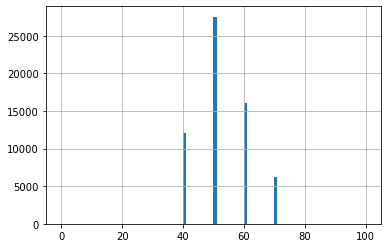

In [18]:
# 'region_rating'
## Найдем границы выбрасов

median_region_rating = train.region_rating.median()
IQR_region_rating = train.region_rating.quantile(0.75) - train.region_rating.quantile(0.25)
quant_25_region_rating = train.region_rating.quantile(0.25)
quant_75_region_rating = train.region_rating.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_region_rating, quant_75_region_rating, 
    IQR_region_rating, 
    quant_25_region_rating - 1.5*IQR_region_rating, 
    quant_75_region_rating + 1.5*IQR_region_rating))
train.region_rating.loc[train.region_rating.between(
    quant_25_region_rating - 1.5*IQR_region_rating, 
    quant_75_region_rating + 1.5*IQR_region_rating)].hist(bins=100, range=(0, 100))
plt

In [19]:
train.region_rating.describe() # Посмотрим с помощью описательной статистики.

count    73799.000000
mean        56.725701
std         13.055717
min         20.000000
25%         50.000000
50%         50.000000
75%         60.000000
max         80.000000
Name: region_rating, dtype: float64

25-й перцентиль: 30.0, 75-й перцентиль: 48.0, IQR: 18.0, Границы выбросов [3.0, 75.0].


<module 'matplotlib.pyplot' from '/Users/aleksandrasokolova/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

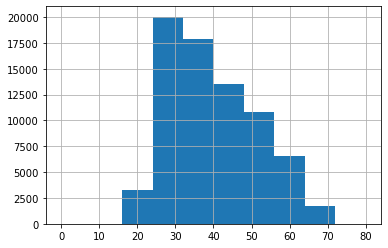

In [20]:
# 'age'
## Найдем границы выбрасов

median_age = train.age.median()
IQR_age = train.age.quantile(0.75) - train.age.quantile(0.25)
quant_25_age = train.age.quantile(0.25)
quant_75_age = train.age.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_age, quant_75_age, 
    IQR_age, 
    quant_25_age - 1.5*IQR_age, 
    quant_75_age + 1.5*IQR_age))
train.age.loc[train.age.between(
    quant_25_age - 1.5*IQR_age, 
    quant_75_age + 1.5*IQR_age)].hist(bins=10, range=(0, 80))
plt

In [21]:
train.age.describe() # Посмотрим с помощью описательной статистики.

count    73799.000000
mean        39.280641
std         11.520378
min         21.000000
25%         30.000000
50%         37.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0, Границы выбросов [0.0, 0.0].


<module 'matplotlib.pyplot' from '/Users/aleksandrasokolova/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

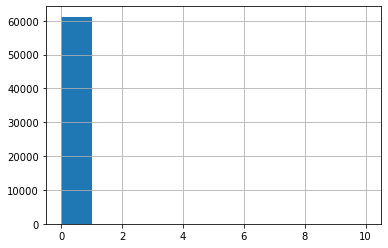

In [22]:
# 'decline_app_cnt'
## Найдем границы выбрасов

median_decline_app_cnt = train.decline_app_cnt.median()
IQR_decline_app_cnt = train.decline_app_cnt.quantile(0.75) - train.decline_app_cnt.quantile(0.25)
quant_25_decline_app_cnt = train.decline_app_cnt.quantile(0.25)
quant_75_decline_app_cnt = train.decline_app_cnt.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_decline_app_cnt, quant_75_decline_app_cnt, 
    IQR_decline_app_cnt, 
    quant_25_decline_app_cnt - 1.5*IQR_decline_app_cnt, 
    quant_75_decline_app_cnt + 1.5*IQR_decline_app_cnt))
train.decline_app_cnt.loc[train.decline_app_cnt.between(
    quant_25_decline_app_cnt - 1.5*IQR_decline_app_cnt, 
    quant_75_decline_app_cnt + 1.5*IQR_decline_app_cnt)].hist(bins=10, range=(0, 10))
plt

In [23]:
train.decline_app_cnt.describe() # Посмотрим с помощью описательной статистики.

count    73799.000000
mean         0.275749
std          0.804272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: decline_app_cnt, dtype: float64

<AxesSubplot:>

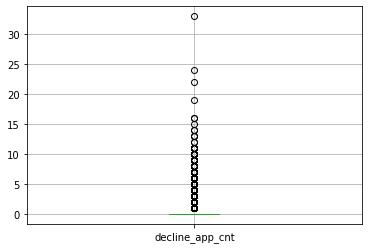

In [24]:
train.boxplot(column=['decline_app_cnt']) # Построим ящик с усами.

Мы видим, что все значения отличные от нуля считаются выбросами, удалять их не имеет смысла, так что посмотрим как поведет себя модель с данным признаком, при необходимости удалим его.

In [25]:
# Для удаления этого признака

#train.drop(['decline_app_cnt'], axis=1, inplace=True) 

25-й перцентиль: 0.0, 75-й перцентиль: 3.0, IQR: 3.0, Границы выбросов [-4.5, 7.5].


<module 'matplotlib.pyplot' from '/Users/aleksandrasokolova/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

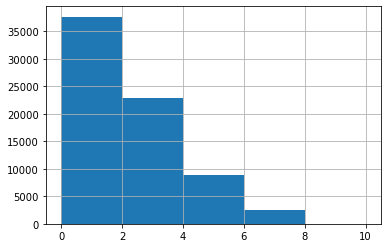

In [26]:
# 'bki_request_cnt'
## Найдем границы выбрасов

median_bki_request_cnt = train.bki_request_cnt.median()
IQR_bki_request_cnt = train.bki_request_cnt.quantile(0.75) - train.bki_request_cnt.quantile(0.25)
quant_25_bki_request_cnt = train.bki_request_cnt.quantile(0.25)
quant_75_bki_request_cnt = train.bki_request_cnt.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_bki_request_cnt, quant_75_bki_request_cnt, 
    IQR_bki_request_cnt, 
    quant_25_bki_request_cnt - 1.5*IQR_bki_request_cnt, 
    quant_75_bki_request_cnt + 1.5*IQR_bki_request_cnt))
train.bki_request_cnt.loc[train.bki_request_cnt.between(
    quant_25_bki_request_cnt - 1.5*IQR_bki_request_cnt, 
    quant_75_bki_request_cnt + 1.5*IQR_bki_request_cnt)].hist(bins=5, range=(0, 10))
plt

In [27]:
train.bki_request_cnt.describe() # Посмотрим с помощью описательной статистики.

count    73799.000000
mean         2.000339
std          2.252073
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         53.000000
Name: bki_request_cnt, dtype: float64

25-й перцентиль: 20000.0, 75-й перцентиль: 48000.0, IQR: 28000.0, Границы выбросов [-22000.0, 90000.0].


<module 'matplotlib.pyplot' from '/Users/aleksandrasokolova/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

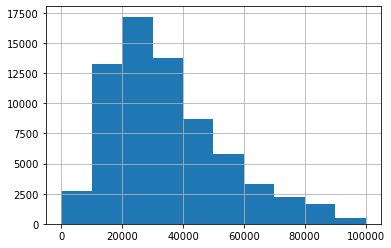

In [28]:
# 'income'
## Найдем границы выбрасов

median_income = train.income.median()
IQR_income = train.income.quantile(0.75) - train.income.quantile(0.25)
quant_25_income = train.income.quantile(0.25)
quant_75_income = train.income.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_income, quant_75_income, 
    IQR_income, 
    quant_25_income - 1.5*IQR_income, 
    quant_75_income + 1.5*IQR_income))
train.income.loc[train.income.between(
    quant_25_income - 1.5*IQR_income, 
    quant_75_income + 1.5*IQR_income)].hist(bins=10, range=(0, 100000))
plt

In [29]:
train.income.describe() # Посмотрим с помощью описательной статистики.

count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

25-й перцентиль: -2.259533835, 75-й перцентиль: -1.56983126, IQR: 0.6897025750000001, Границы выбросов [-3.2940876975, -0.5352773974999998].


<module 'matplotlib.pyplot' from '/Users/aleksandrasokolova/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

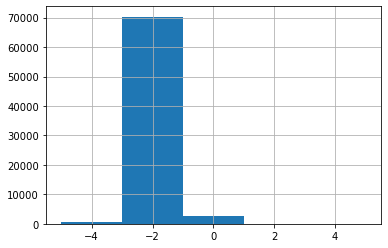

In [30]:
# 'score_bki'

median_score_bki = train.score_bki.median()
IQR_score_bki = train.score_bki.quantile(0.75) - train.score_bki.quantile(0.25)
quant_25_score_bki = train.score_bki.quantile(0.25)
quant_75_score_bki = train.score_bki.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_score_bki, quant_75_score_bki, 
    IQR_score_bki, 
    quant_25_score_bki - 1.5*IQR_score_bki, 
    quant_75_score_bki + 1.5*IQR_score_bki))
train.score_bki.loc[train.score_bki.between(
    quant_25_score_bki - 1.5*IQR_score_bki, 
    quant_75_score_bki + 1.5*IQR_score_bki)].hist(bins=5, range=(-5, 5))
plt

In [31]:
train.score_bki.describe() # Посмотрим с помощью описательной статистики.

count    73799.000000
mean        -1.904724
std          0.498231
min         -3.624586
25%         -2.259534
50%         -1.920823
75%         -1.569831
max          0.199773
Name: score_bki, dtype: float64

Подъитожим.
Мы видим, что выбросы есть в параметрах 'score_bki', 'bki_request_cnt','income'.

Удалим выбросы в признаках 'score_bki' и 'bki_request_cnt','income'. 

In [32]:
# Удалим выбросы

q_low = quant_25_score_bki - 1.5*IQR_score_bki
q_hi  = quant_75_score_bki + 1.5*IQR_score_bki

train = train[(train['score_bki'] < q_hi) & (train['score_bki'] > q_low)]

In [33]:
q_low_brc = quant_25_bki_request_cnt - 1.5*IQR_bki_request_cnt
q_hi_brc  = quant_75_bki_request_cnt + 1.5*IQR_bki_request_cnt

train = train[(train['bki_request_cnt'] < q_hi_brc) & (train['bki_request_cnt'] > q_low_brc)]

In [34]:
q_low_inc = quant_25_income - 1.5*IQR_income
q_hi_inc  = quant_75_income + 1.5*IQR_income

train = train[(train['income'] < q_hi_inc) & (train['income'] > q_low_brc)]

In [35]:
train.describe()

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
count,66843.000000,6.684300e+04,66843.000000,66843.000000,66843.000000,66843.00000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000
mean,55348.467798,2.014027e+07,0.420478,39.198540,0.298490,0.16078,0.264096,0.163158,-1.912183,1.767261,56.117320,1.570965,2.488428,32149.325060,1.756384,2.739524,0.129512,0.127209
std,31817.596311,1.077465e+02,0.493639,11.671643,0.457599,0.36733,0.770197,0.369513,0.482597,1.660642,12.780018,0.528561,0.691087,17231.373715,1.136458,1.016072,0.335769,0.333209
min,1.000000,2.014010e+07,0.000000,21.000000,0.000000,0.00000,0.000000,0.000000,-3.294032,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000,0.000000
25%,27654.500000,2.014020e+07,0.000000,29.000000,0.000000,0.00000,0.000000,0.000000,-2.258132,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000,0.000000
50%,55605.000000,2.014030e+07,0.000000,37.000000,0.000000,0.00000,0.000000,0.000000,-1.924396,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000,0.000000
75%,82915.500000,2.014033e+07,1.000000,48.000000,1.000000,0.00000,0.000000,0.000000,-1.580073,3.000000,60.000000,2.000000,3.000000,40000.000000,2.000000,3.000000,0.000000,0.000000
max,110147.000000,2.014043e+07,1.000000,72.000000,1.000000,1.00000,33.000000,1.000000,-0.535839,7.000000,80.000000,3.000000,3.000000,89000.000000,4.000000,4.000000,1.000000,1.000000


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66843 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         66843 non-null  int64  
 1   app_date          66843 non-null  int64  
 2   education         66843 non-null  object 
 3   sex               66843 non-null  int64  
 4   age               66843 non-null  int64  
 5   car               66843 non-null  int64  
 6   car_type          66843 non-null  int64  
 7   decline_app_cnt   66843 non-null  int64  
 8   good_work         66843 non-null  int64  
 9   score_bki         66843 non-null  float64
 10  bki_request_cnt   66843 non-null  int64  
 11  region_rating     66843 non-null  int64  
 12  home_address      66843 non-null  int64  
 13  work_address      66843 non-null  int64  
 14  income            66843 non-null  int64  
 15  sna               66843 non-null  int64  
 16  first_time        66843 non-null  int64 

Так же после построения графиков распределения стало очевидно, что данные 'age', 'bki_request_cnt', 'income', 'region_rating' нуждаются в нормализации.

In [37]:
# Используем StandardScaler из библиотеки sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])

In [38]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,-0.643737,SCH,1,1.953592,1,1,-0.342897,0,-0.200106,-0.462030,-0.478666,1,2,-0.821144,4,1,0,0
1,63161,0.386467,SCH,0,1.696557,0,0,-0.342897,0,0.787220,0.742333,-0.478666,2,3,-0.763109,4,1,0,0
2,25887,-0.643737,SCH,1,-1.216508,1,0,2.253860,0,1.044443,-0.462030,1.868766,1,2,-0.124734,1,4,1,0
3,16222,-1.367664,SCH,0,1.182487,0,0,-0.342897,0,-0.301057,0.140151,-0.478666,2,3,-1.285416,1,3,0,0
4,101655,1.370265,GRD,1,0.754095,0,0,-0.342897,1,1.383071,-0.462030,0.303811,2,3,-0.124734,1,4,1,0


## Потом выбрать что оставить - написать что и почему выбрала

Проведем корреляционный анализ, что бы отобрать низко коррелируемые признаки.

<AxesSubplot:>

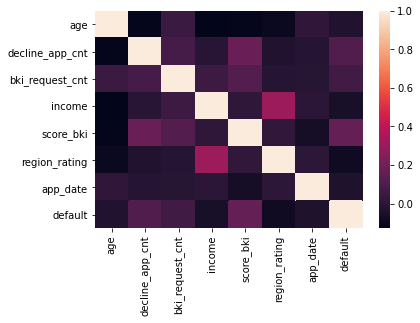

In [39]:
plt.figure()
sns.heatmap((train[['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating', 'app_date','default']]).corr())

In [40]:
train[['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating','app_date', 'default']].corr()

,age,decline_app_cnt,bki_request_cnt,income,score_bki,region_rating,app_date,default
age,1.000000,-0.118567,0.045459,-0.127521,-0.114867,-0.093393,0.015174,-0.028325
decline_app_cnt,-0.118567,1.000000,0.076820,-0.004338,0.176522,-0.030533,-0.017059,0.109093
bki_request_cnt,0.045459,0.076820,1.000000,0.055830,0.115112,-0.017301,-0.010472,0.062806
income,-0.127521,-0.004338,0.055830,1.000000,0.013259,0.308763,0.002778,-0.054887
score_bki,-0.114867,0.176522,0.115112,0.013259,1.000000,0.018412,-0.062264,0.167122
region_rating,-0.093393,-0.030533,-0.017301,0.308763,0.018412,1.000000,0.005492,-0.081912
app_date,0.015174,-0.017059,-0.010472,0.002778,-0.062264,0.005492,1.000000,-0.037417
default,-0.028325,0.109093,0.062806,-0.054887,0.167122,-0.081912,-0.037417,1.000000


Оценим значимость числовых переменных с использованием функции f_classif из библиотеки sklearn.

<AxesSubplot:>

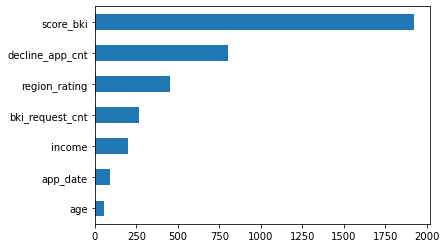

In [41]:
imp_num = Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели.

Изучим переменную, которую будем предстказывать.
Она содержит данные 0 - нет дефолта или 1 - дефолт клиента.

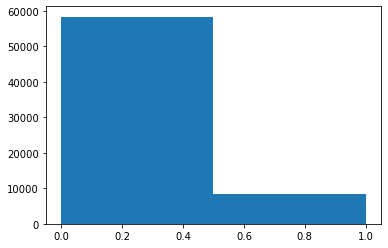

In [42]:
# Постройте диаграмму для переменной default. Каких клиентов у банка больше?

patches = plt.hist(train.default, bins=2)
plt.show()

Мы видим, что данных о клиентах без дефолта намного больше, чем данных о клиентах с дефолтом. Это может привести к дисбалансу, при котором распределение целевых значений будет сильно отличаться от равномерного.

Сократим количество объектов превалирующих классов с помощью - undersampling

In [43]:
num_0 = len(train[train['default']==0])
num_1 = len(train[train['default']==1])
undersampled_train = pd.concat([train[train['default']==0].sample(num_1),
                               train[train['default']==1]])

In [44]:
undersampled_train.head() # Посмотрим новые данные

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
71809,44570,-0.458114,SCH,0,1.011130,0,0,-0.342897,0,-0.913541,0.140151,0.303811,2,3,-0.414905,4,3,0,0
18358,80958,0.534965,UGR,1,1.096808,1,0,-0.342897,0,-0.648207,-0.462030,-0.478666,1,1,-0.124734,1,3,0,0
49528,53710,0.302937,SCH,0,0.754095,0,0,-0.342897,0,-0.926209,-0.462030,-1.261144,1,2,-0.995246,1,3,0,0
43249,36328,-0.541644,SCH,1,-1.045151,1,1,-0.342897,0,0.703351,1.344514,1.868766,2,3,1.616289,4,3,0,0
23072,105763,1.425952,PGR,0,-1.045151,1,1,0.955482,1,0.503797,-0.462030,0.303811,1,2,-0.414905,1,3,1,0


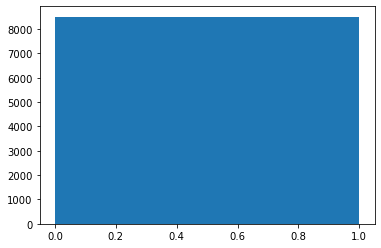

In [45]:
# Проверим, что получилось

patches = plt.hist(undersampled_train.default, bins=2)
plt.show()

In [46]:
# Обновим X_cat для сбалансированных данных

X_cat = OneHotEncoder(sparse = False).fit_transform(undersampled_train[cat_cols].values)

In [47]:
X_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [49]:
# Объединяем
## Исключила из модели параметр bki_request_cnt, т.к. без него модель показывает лучший результат.

X = np.hstack([ undersampled_train[['app_date', 'age', 'decline_app_cnt', 'income', 'score_bki', 
                       'region_rating', 'sex', 'car', 'car_type', 'good_work', 
                       'foreign_passport']].values, X_cat])
y = undersampled_train['default'].values

In [50]:
# Разделим данные для обучения.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
# Обучим модель LogisticRegression

model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=400)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

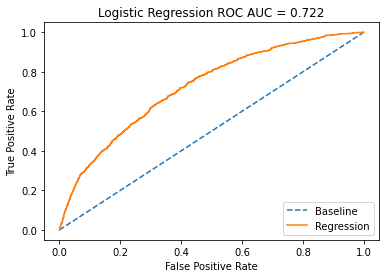

In [53]:
# В качестве метода оценки прогностической способности модели используем ROC-анализ.

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_train, y_train)

search.best_params_

{'C': 3.34431505414951, 'penalty': 'l2'}

In [55]:
y_predicted = search.predict(X_test)

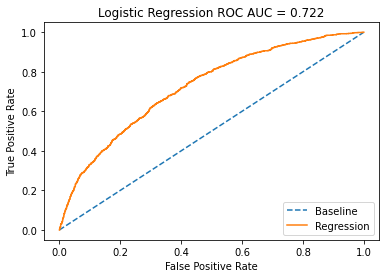

In [56]:
probss = search.predict_proba(X_test)
probss = probss[:,1]


fpr, tpr, threshold = roc_curve(y_test, probss)
roc_auc = roc_auc_score(y_test, probss)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Посмотрим результат работы моделей на матрице ошибок.

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1111,  574],
       [ 589, 1128]])

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[1109,  576],
       [ 585, 1132]])

https://www.kaggle.com/alexandrasokolova/alexandra-sokolova-sf-dst-credit-scoring